In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np

# Tensor

- Three attributes: `data`, `grad` and `grad_fn`
- `requires_grad=True` means track all operations on it, and `.backward()` will update gradients automatically. The arrtibute `.grad` stores the gradients of the tensor.
- `.detach()` detaches the tensor from computation history. When **evaluating the model**, `with torch.no_grad():` block is useful to prevent updating tensors with `requires_grad=True`.

In [2]:
x = torch.ones(2, 2)

print('x: ', x)
print('x dtype: ', x.dtype)
print('x device: ', x.device)
print('x reshape shape: ', x.reshape(1,4).shape)
print('x requires_grad: ', x.requires_grad)

# set requires_grad=True inplace
x.requires_grad_(True)

print('x grad_fn: ', x.grad_fn)

print('='*10)

# y is created by an operation
y = torch.add(x, 2)
print('y: ', y)
print('y requires_grad: ', y.requires_grad)
print('y grad_fn: ', y.grad_fn)

out = torch.mean(y)
out.backward()
print(x.grad)

x:  tensor([[1., 1.],
        [1., 1.]])
x dtype:  torch.float32
x device:  cpu
x reshape shape:  torch.Size([1, 4])
x requires_grad:  False
x grad_fn:  None
y:  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)
y requires_grad:  True
y grad_fn:  <AddBackward object at 0x112d7ea90>
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


# Sharing memory for performance: copy vs share

In [3]:
a = np.array([1, 2, 3])
t1 = torch.Tensor(a)

# Perferred copy operation
t2 = torch.tensor(a)

# Perfered share operation
t3 = torch.as_tensor(a)

t4 = torch.from_numpy(a)

# copy
print(t1)
print(t2)

# share
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3])


In [4]:
a[0] = 0
a[1] = 0
a[2] = 0

# copy
print(t1)
print(t2)

# share
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 0, 0])
tensor([0, 0, 0])


# torch.nn.functional

In [5]:
x = np.linspace(-3, 3, 100)

# convert numpy array to tensor
# factory function
# specify dtype
x = torch.tensor(x, dtype=torch.float32)

print('x shape:', x.shape)
print('reshape x size:', x.reshape(2, -1).shape)

# convert tensor to numpy array
x_data = x.data.numpy()

# relu 
y_relu = F.relu(x).data.numpy()
# leaky relu
y_leaky_relu = F.leaky_relu(x, negative_slope=0.1).data.numpy()
# sigmoid
y_sigmoid = F.sigmoid(x).data.numpy()
# tanh
y_tanh = F.tanh(x).data.numpy()

x shape: torch.Size([100])
reshape x size: torch.Size([2, 50])


/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


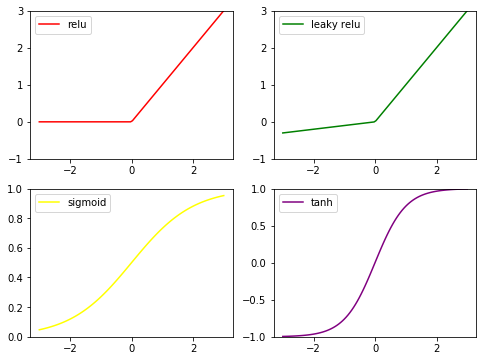

In [6]:
plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x_data, y_relu, c='red', label='relu')
plt.ylim(-1, 3)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_data, y_leaky_relu, c='green', label='leaky relu')
plt.ylim(-1, 3)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_data, y_sigmoid, c='yellow', label='sigmoid')
plt.ylim(0, 1)
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_data, y_tanh, c='purple', label='tanh')
plt.ylim(-1, 1)
plt.legend(loc='best')